In [29]:
import cv2
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
from random import randint
from skimage.feature import hog
from skimage import data, exposure

In [30]:
global img_3, blank
img_3 = np.zeros([300,300,3],dtype=np.uint8)
img_3.fill(255)
(h, w) = img_3.shape[:2]
center = (w / 2, h / 2)

In [31]:
cv2.imshow("Window", img_3)
cv2.destroyAllWindows()

In [32]:
def compute_hist(img):
    hist = np.zeros((256,), np.uint8)
    h, w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    return hist
def equal_hist(hist):
    cumulator = np.zeros_like(hist, np.float64)
    for i in range(len(cumulator)):
        cumulator[i] = hist[:i].sum()
    #print(cumulator)
    new_hist = (cumulator - cumulator.min())/(cumulator.max() - cumulator.min()) * 255
    #new_hist = np.uint8(new_hist)
    return new_hist

In [33]:
def HistogramOfOrientedGradients():
    gx = cv2.Sobel(img_3, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img_3, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    histr_mag = cv2.calcHist([mag],[0],None,[256],[0,256])
    plt.plot(histr_mag, c = 'k',label = 'histr_mag')
    plt.savefig('histr_mag.png')
    # histr_img_mag = cv2.imread('histr_mag.png')
    plt.clf()
    histr_angle = cv2.calcHist([angle],[0],None,[256],[0,256])
    plt.plot(histr_angle, c = 'k',label = 'histr_mag')
    plt.savefig('histr_angle.png')
    return mag, angle, histr_mag, histr_angle

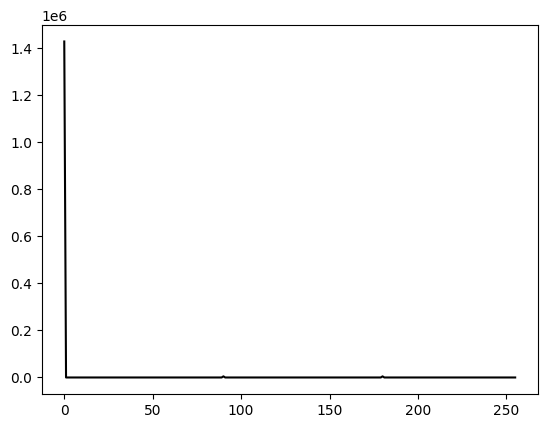

In [34]:
lines_list =[]
while(True):
    cv2.imshow('Window', img_3)
    k = cv2.waitKey(0)
    if k == ord('l'):
        image_location = input('Paste the image location:')
        img_3 = cv2.imread(image_location)
        blank = np.zeros(shape=(img_3.shape[0], img_3.shape[1]))
        blank.fill(255)
        cv2.imshow('Window', img_3)
    if k == ord('a'):
        gray = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)
        dst = cv2.cornerHarris(gray,2,3,.04)
        dst = cv2.dilate(dst,None)
        blank[dst>0.01*dst.max()]=[0]
        img_3 = blank
    if k == ord('2'):
        magShape, angleShape, histr_mag, histr_angle = HistogramOfOrientedGradients()
        histr_img_mag = cv2.imread('histr_mag.png')
        histr_img_angle = cv2.imread('histr_angle.png')
        cv2.imshow('magShape', magShape)
        cv2.imshow('angleShape', angleShape)
        cv2.imshow('histr_mag', histr_img_mag)
        cv2.imshow('histr_angle', histr_img_angle)
        
        cv2.waitKey(0)
    if k == ord('b'):
        fd, hog_image = hog(img_3, orientations=9, pixels_per_cell=(8, 8),
        cells_per_block=(2, 2), visualize=True, multichannel=True)
        cv2.imshow('hog', hog_image)
    if k == ord('3'):
        img_3 = cv2.Canny(img_3,100,200)
    if k == ord('4'):
        grey = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(grey,100,200)
        lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=100, minLineLength=5, maxLineGap=10)
        print(lines[0])
        for points in lines:
            x1,y1,x2,y2=points[0]
            cv2.line(blank,(x1,y1),(x2,y2),(0,255,0),2)
            lines_list.append([(x1,y1),(x2,y2)])
        img_3 = blank
    if k == ord('r'):
        img_3 = cv2.imread(image_location)
    if k == ord('x'):
        img_3.fill(255)
    if  k == ord('q'):
        break
cv2.destroyAllWindows()